In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install cvxopt

In [4]:
## NUMBER OF ASSETS
n_assets = 100
## NUMBER OF OBSERVATIONS
# n_obs = 1000
# return_vec = np.random.randn(n_assets, n_obs)
return_vec = pd.read_csv('real_returns_0501.csv')[-20:].T
return_vec.shape

(100, 20)

In [5]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec.to_numpy())

     pcost       dcost       gap    pres   dres
 0:  7.8726e-04 -1.0081e+00  1e+02  1e+01  1e+01
 1:  1.7161e-03 -9.8822e-01  1e+00  2e-03  2e-03
 2:  1.6979e-03 -1.7899e-02  2e-02  4e-05  4e-05
 3:  1.0052e-03 -8.1953e-03  9e-03  2e-05  2e-05
 4: -1.3192e-03 -1.0468e-02  9e-03  2e-05  2e-05
 5: -7.8065e-03 -9.4550e-03  2e-03  3e-07  3e-07
 6: -8.0726e-03 -8.0982e-03  3e-05  4e-09  4e-09
 7: -8.0844e-03 -8.0846e-03  3e-07  4e-11  4e-11
 8: -8.0845e-03 -8.0845e-03  3e-09  4e-13  4e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.8761e-04 -1.0081e+00  1e+02  1e+01  1e+01
 1:  1.7165e-03 -9.8822e-01  1e+00  2e-03  2e-03
 2:  1.6983e-03 -1.7898e-02  2e-02  4e-05  4e-05
 3:  1.0056e-03 -8.1943e-03  9e-03  2e-05  2e-05
 4: -1.3187e-03 -1.0467e-02  9e-03  2e-05  2e-05
 5: -7.8029e-03 -9.4508e-03  2e-03  3e-07  3e-07
 6: -8.0700e-03 -8.0956e-03  3e-05  4e-09  4e-09
 7: -8.0818e-03 -8.0821e-03  3e-07  4e-11  4e-11
 8: -8.0819e-03 -8.0819e-03  3e-09  4e-13  4e-1

In [6]:
weights, risks

(array([[8.39671261e-10],
        [6.84640068e-10],
        [4.39473158e-09],
        [2.19488649e-09],
        [2.83437918e-09],
        [1.15617502e-10],
        [1.60172966e-10],
        [1.52771780e-10],
        [2.06776998e-09],
        [7.66011571e-10],
        [6.85813332e-10],
        [1.42598987e-09],
        [1.62963771e-09],
        [5.54807740e-09],
        [1.11665156e-09],
        [1.86131551e-10],
        [6.59802388e-10],
        [9.84168972e-10],
        [2.02489561e-10],
        [1.22145759e-09],
        [5.30682701e-09],
        [1.22652486e-10],
        [1.18601611e-09],
        [1.60762631e-10],
        [5.93144506e-08],
        [5.25298811e-10],
        [5.73331805e-09],
        [1.75031399e-10],
        [3.24361145e-10],
        [2.87215963e-10],
        [4.27111760e-10],
        [3.50835061e-10],
        [2.05207690e-10],
        [7.87141660e-10],
        [7.33494830e-10],
        [2.31399935e-10],
        [5.44474411e-10],
        [4.72387258e-10],
        [1.8

In [14]:
# '''
# min f(x1, x2, x3) = x1^2 + x2^2 + x3^2
# s.t.
#     x1*x2 >= 1
#     x1*x2 <= 5
#     x2 + x3 = 1
#     0 <= x1, x2, x3 <= 5
# '''


# def obj_func(p):
#     x1, x2, x3 = p
#     return x1 ** 2 + x2 ** 2 + x3 ** 2


# constraint_eq = [
#     lambda x: 1 - x[1] - x[2]
# ]

# constraint_ueq = [
#     lambda x: 1 - x[0] * x[1],
#     lambda x: x[0] * x[1] - 5
# ]

# # %% Do DifferentialEvolution


# de = DE(func=obj_func, n_dim=3, size_pop=50, max_iter=800, lb=[0, 0, 0], ub=[5, 5, 5],
#         constraint_eq=constraint_eq, constraint_ueq=constraint_ueq)

# best_x, best_y = de.run()
# best_x, best_y


(array([1.00187574, 0.9982992 , 0.00170081]), array([2.00035918]))

In [7]:
# from sko.DE import DE

# constraint_eq = []

# constraint_ueq = [
#     # 小于等于0
#     lambda x: sum([abs(i) for i in x]) - 1,
#     lambda x: 0.25 - sum([abs(i) for i in x])
# ]

# def obj_func(p):
#     ''' IR越大越好
#     '''
#     daily_returns = pd.read_csv('to_train.csv')[:-20].reset_index(drop=True).T
#     # daily_returns = pd.read_csv('real_returns.csv')[:10].T
#     daily_returns['ID'] = daily_returns.index.tolist()
#     decisions = pd.DataFrame({'decision': p, 'ID':daily_returns.index.tolist()})    
#     portfolio = daily_returns.merge(decisions, on='ID')
#     portfolio = portfolio[portfolio.decision != 0]
#     weighted_portfolio_return = pd.DataFrame((portfolio.iloc[:, :daily_returns.shape[1]-1].to_numpy().T * portfolio.decision.to_numpy()).T)
#     # print(weighted_portfolio_return)
#     portfolio_daily_return = weighted_portfolio_return.sum(axis=0).apply(lambda x: np.log(1 + x))
#     # print(weighted_portfolio_return.sum(axis=0))

#     ret_T = sum(portfolio_daily_return)
#     D = portfolio_daily_return.shape[0]
#     var = np.sum([(x - ret_T / D)**2 for x in portfolio_daily_return.tolist()]) / (D-1)
#     sdp = np.sqrt(var)
#     annualized_IR = (D+1)/D * 12 * ret_T / np.sqrt(252) / sdp
#     return -annualized_IR


def calIR(p, returns):
    daily_returns = returns.T
    daily_returns['ID'] = daily_returns.index.tolist()
    decisions = pd.DataFrame({'decision': p, 'ID':daily_returns.index.tolist()})    
    portfolio = daily_returns.merge(decisions, on='ID')
    portfolio = portfolio[portfolio.decision != 0]
    weighted_portfolio_return = pd.DataFrame((portfolio.iloc[:, :daily_returns.shape[1]-1].to_numpy().T * portfolio.decision.to_numpy()).T)
    # print(weighted_portfolio_return)
    portfolio_daily_return = weighted_portfolio_return.apply(lambda x: np.log(1 + x)).sum(axis=0)
    # print(weighted_portfolio_return.sum(axis=0))
    # print(weighted_portfolio_return)

    ret_T = sum(portfolio_daily_return)
    D = portfolio_daily_return.shape[0]
    var = np.sum([(x - ret_T / D)**2 for x in portfolio_daily_return.tolist()]) / (D-1)
    sdp = np.sqrt(var)
    annualized_IR = (D+1)/D * 12 * ret_T / np.sqrt(252) / sdp
    return annualized_IR

In [11]:
# from eval import calIR
from sko.DE import DE
'''
min f(x1, ..., x100) = - annualized_IR(x1, ..., x100)
s.t.
    0.25 <= abs(x1) + ... + abs(x100) <= 1
    -1 <= x1, ..., x100 <= 1
'''


constraint_eq = []

constraint_ueq = [
    # 小于等于0
    lambda x: sum([abs(i) for i in x]) - 1,
    lambda x: 0.25 - sum([abs(i) for i in x])
]

def obj_func(p):
    ''' IR越大越好
    '''
    daily_returns = pd.read_csv('real_returns_0501.csv')[-20:].reset_index(drop=True).T
    # daily_returns = pd.read_csv('real_returns.csv')[:10].T
    daily_returns['ID'] = daily_returns.index.tolist()
    decisions = pd.DataFrame({'decision': p, 'ID':daily_returns.index.tolist()})    
    portfolio = daily_returns.merge(decisions, on='ID')
    portfolio = portfolio[portfolio.decision != 0]
    weighted_portfolio_return = pd.DataFrame((portfolio.iloc[:, :daily_returns.shape[1]-1].to_numpy().T * portfolio.decision.to_numpy()).T)
    # print(weighted_portfolio_return)
    portfolio_daily_return = weighted_portfolio_return.apply(lambda x: np.log(1 + x)).sum(axis=0)
    # print(weighted_portfolio_return.sum(axis=0))

    ret_T = sum(portfolio_daily_return)
    D = portfolio_daily_return.shape[0]
    var = np.sum([(x - ret_T / D)**2 for x in portfolio_daily_return.tolist()]) / (D-1)
    sdp = np.sqrt(var)
    annualized_IR = (D+1)/D * 12 * ret_T / np.sqrt(252) / sdp
    return -annualized_IR


de = DE(func=obj_func, n_dim=100, size_pop=2000, max_iter=300, lb=[-1]*100, ub=[1]*100,
    constraint_eq=constraint_eq, constraint_ueq=constraint_ueq)

best_x, best_y = de.run()
print('best_y:', best_y)

best_y: [0.45837622]


In [12]:
calIR(best_x / sum(abs(best_x)), return_vec.T)

-0.3386113684176452

In [13]:
np.array(de.generation_best_Y).argmin()

299

In [14]:
np.array(de.generation_best_Y).argsort()[:20]

array([299, 298, 290, 297, 294, 282, 296, 293, 292, 286, 295, 289, 288,
       275, 291, 276, 287, 273, 274, 281], dtype=int64)

In [19]:
for i in np.array(de.generation_best_Y).argsort()[20:50]:
    p = de.generation_best_X[i]
    print(i, calIR(p / sum(abs(p)), return_vec.T))

272 -4.309667115427535
277 2.9444500600988848
279 5.857834569877783
280 2.1401856436792093
285 5.061755039328141
284 1.765988020074085
266 0.028277610131441283
278 -5.407340045083861
283 5.857834569877783
267 1.7266539640749834
270 -2.02354810180202
269 -2.8645553871465927
261 2.7627745246811375
268 -0.31021862355069685
258 2.5298799046258975
271 3.324681548035901
253 10.7192855043176
265 -3.709853594283315
262 -3.4392327269732847
259 3.3221112749753683
264 0.5738302041758665
256 -8.473594742941843
260 4.466084080037987
254 1.195544001818905
255 3.554616808098002
257 2.8324532491820755
246 3.078550452379433
252 -4.4048260897910705
263 10.7192855043176
250 -9.290685206386442


In [20]:
p = de.generation_best_X[253]
calIR(p / sum(abs(p)), return_vec.T)

10.7192855043176

In [21]:
p / sum(abs(p))

array([-0.0012344 , -0.00696187,  0.01931485, -0.00384889, -0.01149637,
       -0.02755419, -0.00518317,  0.01217412, -0.02182841,  0.00824908,
        0.03321096,  0.00797361,  0.00363107, -0.00338565,  0.00386033,
        0.00372343, -0.01841172, -0.00102018, -0.00263417,  0.00348541,
       -0.00458001, -0.00714914,  0.00742439,  0.01532875,  0.02183105,
        0.01886875, -0.00210319,  0.00231218, -0.00679416, -0.00220731,
        0.00995358, -0.00173445,  0.00617751,  0.01330495,  0.02350038,
       -0.02458097, -0.00896653,  0.00232997, -0.00189188, -0.01030716,
        0.00950169, -0.01173629, -0.00827239,  0.01068318, -0.01596191,
        0.01589973,  0.00555727, -0.00207822, -0.00071245, -0.01561823,
        0.00422272, -0.02124161,  0.00625925,  0.00188849,  0.00650669,
       -0.01145774,  0.02804824, -0.00265728,  0.0204385 ,  0.00955671,
       -0.00112196, -0.03264521, -0.00594396, -0.01973418,  0.00841142,
       -0.00310153, -0.00167838,  0.00742098, -0.00521229,  0.00

In [22]:
id = pd.read_csv('real_returns_0501.csv').columns.tolist()

In [36]:
# # 0401
weight1 = np.array([ 2.06332442e-02, -4.10763137e-03,  5.34416485e-03,  7.47449497e-03,        2.49137228e-03, -1.32175637e-03,  1.17320421e-03, -6.69505126e-03,
        9.20454769e-05, -2.45946555e-02,  1.21342079e-02, -1.67794462e-02,       -2.27010793e-03, -6.27654323e-03,  1.35925874e-02,  1.70691186e-02,
        5.24111241e-03,  3.98907676e-03,  1.16472249e-02, -1.15699046e-02,        1.41598269e-02,  4.00558752e-03, -1.10945383e-02,  1.06492716e-02,
        6.39218563e-03, -8.31554920e-03, -9.68088315e-03, -1.22762700e-02,        2.61818580e-02,  6.38594887e-03, -3.33944653e-03, -1.51064559e-02,
       -2.47133820e-03, -8.33975360e-03, -3.49812122e-03, -1.35078857e-02,        1.82680123e-02, -8.11343372e-03, -9.43617067e-03,  1.62889081e-02,
        9.17660335e-03, -1.41418215e-02, -1.66784307e-02, -6.27933103e-03,        1.86956010e-02, -4.22528231e-04,  1.01631483e-02,  1.94169278e-02,
       -1.89406869e-02,  1.95071995e-02,  2.24504616e-02, -4.91378138e-03,       -1.29875893e-02, -6.33197104e-03, -7.35215468e-03,  1.62886424e-03,
        3.48203487e-04,  2.32373032e-03, -1.29421040e-02,  8.43309766e-03,       -2.82317227e-02,  8.45731934e-03,  1.80328984e-02, -2.46701133e-02,
       -8.23208662e-03, -3.56507987e-03, -8.10055495e-03,  4.32304756e-03,       -7.83453448e-03, -3.21920198e-02,  6.42311870e-03, -8.63793370e-03,       -6.25149703e-04,  7.10502974e-03, -4.45701533e-03,  3.43352078e-03,
       -4.07396577e-03,  1.08137022e-02, -5.83683099e-03, -6.20788897e-03,       -4.35731512e-03,  2.11730429e-02,  8.33862511e-03, -2.39748831e-02,        6.15569040e-03, -2.75250421e-03,  2.56786801e-02,  2.28295623e-02,
       -5.43790697e-03, -1.23263799e-02, -9.88544478e-03, -6.45953828e-03,       -7.51453824e-03,  5.22686141e-03, -9.75358593e-03, -1.16832936e-02,        9.05577859e-04, -5.80486977e-03, -8.30995776e-03, -5.03557765e-03])
weight3 = np.array([ 0.00508734, -0.03173583,  0.01605338, -0.00961393,  0.00325566,       -0.00269823,  0.00667132, -0.01153455, -0.00221938, -0.01647613,
       -0.01865244,  0.00106926,  0.00318946, -0.01264267,  0.01263153,        0.01909051,  0.02322169, -0.00388323, -0.013072  , -0.0064615 ,
       -0.02528196,  0.0062264 ,  0.00590586,  0.00908452,  0.01534831,        0.0109921 ,  0.01256201, -0.00072171, -0.00455383,  0.00470374,
       -0.01093383,  0.00160507,  0.00215813, -0.02978177, -0.03207897,       -0.00746375,  0.00102842, -0.00841213,  0.00673725,  0.02362376,
        0.00125964, -0.01379673,  0.0048464 ,  0.00839614, -0.00024638,        0.0210914 , -0.01463175,  0.03108953, -0.02653312, -0.00211524,
       -0.00672937, -0.01163241, -0.00038082, -0.00161884,  0.00631997,       -0.0100372 ,  0.00727931, -0.00757545,  0.00404089,  0.01546605,        0.01239907,  0.01596456,  0.0033917 , -0.00546989, -0.01519614,
       -0.00131998, -0.00084032,  0.00606429,  0.01173976,  0.01340832,       -0.02405036, -0.00074801,  0.00122192,  0.00731598, -0.00591743,        0.01576287, -0.0013559 , -0.0020214 , -0.02626385, -0.02559459,
        0.021876  ,  0.00056181, -0.00720851,  0.008273  ,  0.01117638,        0.0102073 ,  0.00121616,  0.00307446,  0.00116072,  0.04666243,       -0.00643681, -0.00338984, -0.00353812,  0.0079777 ,  0.01485703,
        0.00037638, -0.00845863, -0.00223939, -0.00513314, -0.00657966])
weight4 = np.array([ 2.60228078e-02, -8.66099244e-03,  9.34741739e-03,  1.82933003e-02,        4.27904508e-03,  5.77818219e-02,  1.84303714e-02,  7.84700039e-03,
        8.37429572e-03, -7.68324403e-03, -9.74561715e-03,  1.77346585e-03,       -3.60766200e-03,  2.97107980e-03,  2.45512834e-04,  9.71701502e-03,       -8.12765433e-03, -1.77126140e-02,  2.16240852e-03,  3.33422953e-03,
       -5.12456335e-03, -1.91987303e-02,  8.47201331e-03, -2.31411795e-02,        1.33810945e-02, -2.15353317e-02,  2.06031123e-03, -2.03918653e-03,       -6.38057486e-03, -1.46080657e-02, -3.97050120e-03,  1.55382108e-03,
       -7.86974882e-03,  3.38751088e-02,  6.47754344e-03,  9.05295031e-03,       -4.52090613e-04, -1.23116867e-02,  1.07450979e-02, -9.22481290e-03,       -9.72475185e-04, -5.54030580e-03,  3.30385418e-04, -2.37779343e-02,       -9.35304417e-03,  5.36822386e-04,  1.90347955e-02,  7.63023204e-03,
       -1.57290027e-02,  8.14312581e-03, -1.61185202e-02, -1.28665352e-02,        3.74959433e-03, -1.77589414e-02,  6.07767929e-03, -4.87556141e-03,       -1.56330883e-02,  1.38530692e-02,  1.58880345e-02, -7.90478469e-03,
       -5.01947331e-04,  4.61146473e-03,  2.10146941e-02, -5.87051054e-03,        9.22043071e-03,  9.90335689e-03,  1.08046601e-03,  5.06077068e-03,        1.34204761e-02,  5.88402826e-03,  1.26851364e-02,  2.20273623e-02,       -1.43499111e-02, -8.34110658e-03, -3.27486936e-02,  6.88433638e-03,
        5.60164145e-03,  3.63988661e-03, -5.23790648e-03, -9.95629219e-03,        7.21523133e-03, -4.69114984e-03,  1.11266478e-02,  7.57999544e-03,       -8.35985080e-03,  1.45717584e-02,  1.16206502e-02,  9.35649701e-03,       -4.97437796e-03,  1.99448769e-02,  1.90001268e-02,  4.22708762e-03,
        8.63195429e-03, -1.88915039e-03,  4.69114722e-05,  4.22216494e-03,        1.64735361e-02,  4.00138527e-03,  5.17099695e-04,  1.43229300e-04])

weight5 = np.array([-2.24770132e-03, -7.09486909e-03, -1.71559197e-02, -2.04897951e-02,       -1.59557545e-02,  2.03893060e-03,  2.43509019e-03, -1.25018053e-02,
       -1.72139202e-03, -7.41110220e-03,  2.40930751e-05,  9.00922602e-03,       -2.02268641e-02,  5.48091530e-03,  3.22931604e-03,  5.26492699e-02,
        9.18475262e-04,  3.04819630e-04, -5.74853960e-03, -3.39700259e-03,
        3.67591711e-03,  1.24232648e-02, -2.27156750e-03, -7.26369671e-03,       -2.38173778e-03,  1.03048625e-02,  7.82973161e-03,  2.29292674e-02,
       -8.63681688e-04,  1.29609593e-02,  6.97733732e-03,  6.52945184e-04,       -3.00216647e-03, -1.33019536e-02,  1.99398942e-02, -8.11131834e-03,
        1.67657348e-02,  8.77254944e-04,  2.42559950e-02, -8.83918724e-04,       -8.70189663e-03,  1.58228586e-03, -1.37690604e-02, -9.40751729e-04,        1.08166065e-02, -8.59323819e-04, -1.61105159e-03, -1.12364229e-02,
       -6.96566315e-04, -3.88829647e-03, -7.61301966e-03, -3.00145719e-02,       -1.17556946e-02,  1.85611657e-02, -1.61140496e-02, -2.75136311e-02,
       -6.47717319e-03, -3.89580450e-03, -1.77892743e-03, -1.23181696e-02,
        6.50359236e-03, -1.11099552e-02,  3.26657021e-03,  7.96601770e-03,       -3.42160569e-03, -1.78566258e-03, -2.04881687e-03,  1.90404361e-02,       -5.82765211e-04, -3.02577333e-02, -7.44730769e-03,  2.39828139e-02,
       -4.45822531e-04, -4.67808595e-03, -2.56696081e-02,  1.17104126e-02,       -1.18902773e-02, -2.17524250e-03, -6.94047583e-03, -1.93805626e-03,
       -6.97073377e-04, -9.29410745e-03, -2.66420371e-02,  7.44696216e-03,        4.13739160e-04,  3.52189681e-03, -2.06866189e-02, -4.45255018e-03,
        2.16403656e-03,  5.09895257e-02,  1.42429042e-02,  3.88548691e-03,       -2.57715822e-02,  9.92702384e-03,  1.44079939e-02, -3.44744395e-03,
       -9.37358241e-03, -1.56799276e-02,  1.63460376e-02,  1.98896559e-02])
# # 沿用上次2
weight2 = np.array([ 0.00511504, -0.0199812 , -0.02666337, -0.01896335, -0.0087312 ,
        0.00089556,  0.01119593,  0.01384229,  0.00650692, -0.01264043,
       -0.01644445, -0.00389316, -0.00798254,  0.01135902,  0.00258728,
        0.00012248,  0.01305458,  0.02385851,  0.00865068,  0.01444192,
        0.00086644,  0.00474297,  0.00461459, -0.00470236, -0.01094001,
       -0.00220901,  0.00733977, -0.01457652,  0.00598891, -0.00216535,
       -0.00072289,  0.00903757,  0.00092664, -0.00953369, -0.00901131,
        0.00276365,  0.00991555, -0.0139941 ,  0.00980564,  0.00981144,
       -0.0088146 ,  0.00857261,  0.01572488,  0.01667885, -0.00428802,
       -0.00192334,  0.00776994,  0.01026573,  0.00605337,  0.00638324,
       -0.0091563 ,  0.01381406, -0.01438183,  0.00863749,  0.01216606,
        0.00788016,  0.0125496 ,  0.01514129,  0.02301839,  0.00101528,
       -0.00959969,  0.0046512 , -0.00701449, -0.00769643, -0.00616765,
        0.0083399 , -0.01113896, -0.00043195, -0.00197254, -0.00982371,
       -0.01408245,  0.00187163, -0.01948859, -0.00424883, -0.00541147,
       -0.01291902,  0.01215968, -0.00077185, -0.01416818, -0.00609302,
        0.00442317,  0.01416398,  0.01077725,  0.00809357,  0.03193586,
       -0.01801913, -0.00527898,  0.01451986,  0.00670093, -0.0051314 ,
        0.00079251,  0.02727202,  0.00926293,  0.00568535, -0.00507388,
        0.03318227,  0.01744245, -0.01898509,  0.03914968,  0.00122509])

weight6 = np.array([-2.24770132e-03, -7.09486909e-03, -1.71559197e-02, -2.04897951e-02,
       -1.59557545e-02,  2.03893060e-03,  2.43509019e-03, -1.25018053e-02,
       -1.72139202e-03, -7.41110220e-03,  2.40930751e-05,  9.00922602e-03,
       -2.02268641e-02,  5.48091530e-03,  3.22931604e-03,  5.26492699e-02,
        9.18475262e-04,  3.04819630e-04, -5.74853960e-03, -3.39700259e-03,
        3.67591711e-03,  1.24232648e-02, -2.27156750e-03, -7.26369671e-03,
       -2.38173778e-03,  1.03048625e-02,  7.82973161e-03,  2.29292674e-02,
       -8.63681688e-04,  1.29609593e-02,  6.97733732e-03,  6.52945184e-04,
       -3.00216647e-03, -1.33019536e-02,  1.99398942e-02, -8.11131834e-03,
        1.67657348e-02,  8.77254944e-04,  2.42559950e-02, -8.83918724e-04,
       -8.70189663e-03,  1.58228586e-03, -1.37690604e-02, -9.40751729e-04,
        1.08166065e-02, -8.59323819e-04, -1.61105159e-03, -1.12364229e-02,
       -6.96566315e-04, -3.88829647e-03, -7.61301966e-03, -3.00145719e-02,
       -1.17556946e-02,  1.85611657e-02, -1.61140496e-02, -2.75136311e-02,
       -6.47717319e-03, -3.89580450e-03, -1.77892743e-03, -1.23181696e-02,
        6.50359236e-03, -1.11099552e-02,  3.26657021e-03,  7.96601770e-03,
       -3.42160569e-03, -1.78566258e-03, -2.04881687e-03,  1.90404361e-02,
       -5.82765211e-04, -3.02577333e-02, -7.44730769e-03,  2.39828139e-02,
       -4.45822531e-04, -4.67808595e-03, -2.56696081e-02,  1.17104126e-02,
       -1.18902773e-02, -2.17524250e-03, -6.94047583e-03, -1.93805626e-03,
       -6.97073377e-04, -9.29410745e-03, -2.66420371e-02,  7.44696216e-03,
        4.13739160e-04,  3.52189681e-03, -2.06866189e-02, -4.45255018e-03,
        2.16403656e-03,  5.09895257e-02,  1.42429042e-02,  3.88548691e-03,
       -2.57715822e-02,  9.92702384e-03,  1.44079939e-02, -3.44744395e-03,
       -9.37358241e-03, -1.56799276e-02,  1.63460376e-02,  1.98896559e-02])

weight7 = np.array([ 1.37509532e-03,  3.19901812e-02, -1.16253739e-02, -3.17141335e-03,
       -5.94768984e-04, -2.21508158e-02, -3.66050178e-04,  1.55421181e-02,
       -1.09563563e-02, -6.11477108e-03, -2.21272824e-02, -5.19867421e-03,
        5.41239443e-04,  7.98247355e-03,  6.51914400e-03, -5.08678246e-03,
        1.01179030e-02,  1.14195314e-03, -2.05396731e-03,  5.11417800e-03,
       -1.54673258e-02,  9.24087639e-03,  2.93478767e-03, -1.93478904e-02,
       -7.00373701e-04, -1.91742167e-02,  7.95792638e-03,  7.48336251e-03,
        2.21455496e-02,  1.33742400e-02, -1.46323656e-02,  4.08990415e-03,
       -1.08477845e-02,  5.00197379e-03, -1.95038051e-02,  1.11916877e-02,
        1.78576839e-02, -8.97531060e-04, -1.65211670e-02, -3.89842418e-03,
        8.89682180e-03, -8.49586508e-03, -2.74548819e-02, -1.23452497e-02,
        1.32406960e-03, -1.18705178e-03, -8.60888180e-03,  1.24742752e-02,
        1.21296066e-02,  2.02942881e-02,  5.13083089e-03,  8.92990984e-03,
        1.16633097e-02,  1.30563438e-03,  8.24965919e-03,  4.52607371e-03,
        1.77968680e-03, -4.33786662e-02,  1.45650202e-02,  1.12040596e-03,
       -2.13316523e-03, -1.10907868e-02,  7.72966738e-03,  2.52684588e-03,
        3.82204836e-03,  5.16678611e-03, -7.35300662e-03,  3.12981609e-03,
       -2.20081973e-03, -1.92960325e-03,  1.03081112e-02,  1.67765606e-02,
       -4.07762947e-04,  5.80706347e-03,  1.21824151e-02, -8.69903307e-03,
       -2.16953340e-02,  3.56444554e-03,  2.98674191e-02, -1.45364156e-02,
        3.43789002e-03,  7.62455501e-03, -1.87826365e-02,  7.35620401e-04,
       -9.63932041e-03,  7.69694303e-03, -1.61960423e-02, -1.52411624e-03,
        7.13695990e-03,  2.24472285e-03,  9.91297536e-03,  4.84061771e-02,
        1.91934893e-02,  2.41922221e-02,  2.09358055e-03,  1.70338624e-05,
       -1.10626101e-02, -1.89825217e-02, -5.69610373e-03, -8.59776719e-03])


In [44]:
0.0001 / 100
cols = ['Decision1', 'Decision2', 'Decision3', 'Decision4', 'Decision5']
results = pd.DataFrame({'ID':return_vec.index.tolist(), 'Decision1':weight1/sum(abs(weight1)+1e-5), 'Decision2':weight2/sum(abs(weight2)+1e-5),
            'Decision3':weight3/sum(abs(weight3)+1e-5),'Decision4':weight4/sum(abs(weight4)+1e-5), 'Decision5':weight6/sum(abs(weight6)+1e-5)})# .to_csv('decisions_0401.csv')
results[cols] = results[cols].apply(lambda x: round(x, 5))
results.to_csv('decisions_0401.csv')
results[cols].apply(abs).sum()

Decision1    0.99898
Decision2    0.99900
Decision3    0.99902
Decision4    0.99901
Decision5    0.99902
dtype: float64

In [24]:
weight1 = np.array([-0.0012344 , -0.00696187,  0.01931485, -0.00384889, -0.01149637,
       -0.02755419, -0.00518317,  0.01217412, -0.02182841,  0.00824908,
        0.03321096,  0.00797361,  0.00363107, -0.00338565,  0.00386033,
        0.00372343, -0.01841172, -0.00102018, -0.00263417,  0.00348541,
       -0.00458001, -0.00714914,  0.00742439,  0.01532875,  0.02183105,
        0.01886875, -0.00210319,  0.00231218, -0.00679416, -0.00220731,
        0.00995358, -0.00173445,  0.00617751,  0.01330495,  0.02350038,
       -0.02458097, -0.00896653,  0.00232997, -0.00189188, -0.01030716,
        0.00950169, -0.01173629, -0.00827239,  0.01068318, -0.01596191,
        0.01589973,  0.00555727, -0.00207822, -0.00071245, -0.01561823,
        0.00422272, -0.02124161,  0.00625925,  0.00188849,  0.00650669,
       -0.01145774,  0.02804824, -0.00265728,  0.0204385 ,  0.00955671,
       -0.00112196, -0.03264521, -0.00594396, -0.01973418,  0.00841142,
       -0.00310153, -0.00167838,  0.00742098, -0.00521229,  0.00095055,
       -0.00727838,  0.01421574, -0.01889092, -0.01266637,  0.01210269,
        0.00849413, -0.01321886,  0.00196173,  0.00796664,  0.01180968,
       -0.01238492, -0.01709264,  0.0058607 , -0.01384708,  0.00306649,
        0.02041822, -0.00464787, -0.00706899, -0.00062102, -0.00849257,
       -0.0066724 , -0.01050479,  0.01978749, -0.01333507,  0.01006749,
        0.02499075, -0.00285072, -0.01627905,  0.00190027, -0.00645913])

In [29]:
# 120 days
# 13.451011215479657
weight1 = np.array([-2.75284008e-02, -3.97754789e-02, -1.81212586e-03,  1.38094175e-03,
        9.42208301e-03, -1.71030168e-02,  1.14672286e-02,  1.55726318e-03,
       -3.12849643e-03,  4.74580914e-03, -6.76903781e-04, -5.37125404e-03,
        7.08804758e-03,  2.39142977e-02, -2.54941283e-03, -4.08005023e-02,
       -2.82818006e-03, -2.59571343e-02,  1.15509116e-02,  1.85404813e-02,
        1.18334505e-02,  1.64851894e-02,  5.48628333e-03,  3.86290769e-03,
       -8.53277039e-04, -2.29118173e-02,  6.57054106e-03, -6.70110033e-03,
       -2.02847188e-02,  6.01843312e-05, -2.34666344e-02,  5.32287092e-03,
       -4.53631700e-03,  7.74146358e-03, -1.11778693e-02,  6.67408414e-04,
        1.15827128e-02, -2.57321920e-03,  1.09807912e-02, -1.82337074e-02,
        2.48102752e-02,  1.08430909e-02,  6.16284025e-03,  7.82775090e-03,
       -6.28516225e-03,  8.13584838e-04, -6.53712403e-03,  1.06443943e-02,
       -1.89856483e-03,  1.29077186e-02, -8.07122487e-03, -8.09023021e-03,
       -8.19281864e-04,  2.49459948e-02,  1.93929268e-02, -4.28065101e-03,
       -2.28115902e-03,  4.61809807e-03, -1.06797195e-02, -7.99070309e-03,
        8.75342311e-03,  1.33069586e-02, -3.19995274e-02,  1.21457442e-02,
        2.72313067e-03,  3.59022548e-03,  1.12206126e-02,  2.07046774e-03,
        1.03556630e-02, -2.78444953e-03,  9.54520347e-03, -1.02724144e-02,
        1.09439228e-02, -3.74011540e-03,  1.96025619e-03,  7.79854629e-03,
        2.79722503e-03, -2.59017713e-03,  6.39016097e-03,  1.04569181e-03,
       -1.78378792e-02, -1.24232758e-02, -1.56128753e-03,  3.88042906e-03,
        8.52940550e-03,  2.98631458e-02,  2.19205801e-03,  9.89331743e-03,
       -1.70832663e-02, -1.52048052e-02, -1.86367488e-02, -7.27214163e-03,
       -1.32650271e-03,  9.52383313e-04,  5.92061054e-03, -8.91913593e-03,
        8.39285908e-03, -1.46319987e-02,  1.44360909e-02,  1.65778132e-02])


# 5.941150893408104     
weight2 = np.array([-0.0011089 , -0.01534449, -0.00014131, -0.01356521, -0.01023588,
    -0.00048259, -0.00117397, -0.01942229,  0.0184835 ,  0.00242988,
     0.01469493, -0.00297221, -0.00818425, -0.0290448 , -0.00143429,
     0.01263725,  0.00011356, -0.00388848,  0.00057997,  0.00264273,
     0.01285719, -0.01697757,  0.00628504, -0.00406703, -0.00187891,
    -0.01076953, -0.01490095, -0.02187824, -0.01679134,  0.0001319 ,
    -0.02624278,  0.00911853, -0.03428521, -0.00511216, -0.01134546,
     0.01388879,  0.03199736,  0.00154435,  0.01015098,  0.01092993,
    -0.00770203, -0.00429865,  0.0091382 ,  0.01306989,  0.01358856,
     0.03160157,  0.00091563, -0.01285225,  0.00306426,  0.00205626,
     0.00283003, -0.00372706, -0.00475768,  0.00998402,  0.00329832,
     0.01625984, -0.00541464,  0.00656341, -0.00832898, -0.00286968,
    -0.00603483, -0.00202703, -0.01123155, -0.00815741,  0.02517895,
     0.00816442,  0.00505389, -0.00882266, -0.0089342 , -0.00077233,
    -0.0148778 , -0.00458401, -0.01417049, -0.00731738, -0.02718698,
    -0.02294586, -0.01707459, -0.0240783 , -0.00316166, -0.00066705,
    -0.00538873,  0.00797266, -0.01348659, -0.00301472, -0.00165216,
    -0.00019332,  0.00381956,  0.00853446, -0.00869554, -0.02826617,
     0.00795792,  0.00089001, -0.0149529 , -0.02240482, -0.00874062,
    -0.01254003,  0.0023372 , -0.01921658, -0.01112407,  0.01631586])

# 7.230390895837646
weight3 = np.array([ 9.31499804e-03, -7.37171455e-03, -6.67439846e-03,  8.44276269e-04,
        2.56662719e-03, -9.12539339e-03, -3.96355150e-03, -3.68743637e-02,
        4.28443100e-03, -4.72926134e-02,  1.26031125e-02, -9.49158222e-03,
       -6.61660200e-03, -2.19049748e-03,  1.71918121e-02,  9.69876165e-03,
       -1.37785377e-02, -1.26571799e-02, -7.18187441e-04,  8.21603935e-03,
        1.50940904e-02,  4.70739599e-03,  2.11701460e-02, -1.66052022e-03,
        4.84288449e-03, -4.66635527e-02, -1.84184526e-03,  1.44503903e-02,
       -2.56952666e-02,  5.59681576e-03, -5.37003035e-04, -2.31629840e-02,
        1.14217672e-02, -1.30107508e-02,  2.14679518e-02, -2.67690341e-02,
       -8.01061911e-04,  1.10701100e-02,  3.53802162e-03,  1.79889539e-03,
        2.60833550e-03,  2.14545615e-03,  2.07638563e-03, -1.51920361e-02,
       -3.17571052e-03,  1.66234027e-04, -6.60655637e-03, -1.18813046e-02,
        7.95216867e-03,  4.91650831e-03, -1.15950570e-03,  1.30957203e-05,
       -1.35917819e-02, -2.26182914e-02,  1.20513636e-03, -5.09500605e-03,
       -2.56590248e-02, -2.78335941e-04,  2.09916389e-02, -2.22956781e-02,
       -1.56188366e-02, -1.18853119e-02,  1.10960798e-02,  5.54767568e-03,
        2.04977229e-03, -9.76411320e-03, -9.69276945e-03, -3.63078871e-03,
       -2.69552109e-03, -1.72121975e-02,  7.96733978e-04,  1.99369972e-02,
        9.48002615e-04, -3.97340976e-03,  7.88710713e-03, -1.86278078e-02,
        2.27533617e-02, -3.81913812e-03,  2.83952281e-03,  2.10727901e-02,
       -9.18262259e-03,  4.21778786e-03,  6.57816117e-03,  7.59234584e-04,
       -1.06660542e-03, -6.70237192e-03,  6.73810004e-03,  8.56616854e-03,
       -1.77705254e-02, -2.12258341e-02,  2.28216295e-02, -5.58229144e-03,
        9.20168471e-03,  1.59256963e-02, -5.64405703e-04,  7.83262536e-03,
       -8.65791085e-04, -3.80718574e-03, -8.04340957e-03,  4.29657328e-03])


# 4.20067588390497
weight4 = np.array([ 1.08773100e-02, -8.28322606e-03,  2.22404619e-03,  2.45849155e-03,
        1.46393421e-02,  1.82115182e-02, -2.13618758e-02, -4.40798041e-04,
        6.85390958e-03,  1.05827832e-02, -1.22861349e-02, -6.98680734e-04,
        5.99389281e-03, -7.51147349e-03,  2.73791460e-03, -1.01725850e-02,
       -2.64765108e-02, -8.19883472e-03, -5.12562488e-03,  2.06229628e-02,
       -2.30625303e-02,  1.45807473e-02,  6.67831292e-03,  3.75523401e-03,
        1.63308374e-02,  2.62386165e-03, -3.26857835e-03,  2.39236747e-02,
       -1.54968239e-02, -7.20157960e-03,  2.38362618e-03,  2.84511071e-03,
        1.71386878e-02,  5.41562908e-03, -4.30746024e-03, -4.14017643e-03,
       -4.39464134e-03,  2.08602337e-02, -7.36374666e-03, -1.83007099e-02,
        7.83561633e-04, -2.94226502e-02,  1.15959584e-02, -7.53692039e-03,
       -1.20015684e-02,  5.89510630e-03,  1.87013553e-02, -7.47714859e-03,
        1.75063598e-02, -2.85372437e-03, -1.79733552e-03, -2.41099713e-02,
       -2.56258628e-02, -1.47353699e-02,  2.67338500e-02,  1.38865817e-02,
        7.24888846e-03,  1.05524384e-02, -3.10158892e-03, -1.24470579e-02,
        4.25032364e-03, -1.11917290e-02,  1.32043810e-02,  3.07640088e-03,
        2.11142568e-02, -6.41210414e-03, -6.34207793e-04, -1.45282063e-02,
        2.67506831e-03,  1.12592042e-02, -1.62570417e-02,  1.21604814e-02,
       -3.87156751e-03, -4.86567717e-03,  9.17465234e-03, -7.93620351e-03,
        1.09270342e-02,  3.62076897e-04,  2.33791340e-02,  1.66256905e-02,
        1.43237307e-03,  4.46897266e-03, -3.25390659e-03,  3.40540405e-03,
        3.45900274e-03,  1.67540398e-02, -1.98435851e-02,  1.17999478e-02,
       -4.15483220e-04, -1.61737477e-03,  1.03416426e-02, -2.01649949e-02,
       -5.96032444e-03, -6.79771764e-04,  4.26051506e-03,  1.41359045e-05,
        2.18214800e-02,  1.10244457e-02,  4.98459936e-03,  6.54914341e-03])

# 20 days
# 12.212694995882295
weight5 = np.array([ 0.00757067, -0.01198137,  0.01127877, -0.01497662, -0.01281749,
       -0.00485938,  0.00182533,  0.00181949, -0.00463318, -0.00841613,
        0.00562399, -0.01236804,  0.00046793,  0.00506014, -0.02024252,
        0.03796806, -0.00478788, -0.01917832,  0.00545143, -0.00937888,
        0.01993783, -0.00150363, -0.01959124, -0.00987594,  0.01503409,
        0.0143857 ,  0.00409182, -0.00562504,  0.01186271, -0.00355423,
        0.00803681, -0.01234237,  0.00015623, -0.00214829, -0.00506922,
       -0.01871814, -0.00392203, -0.00389231,  0.03669328,  0.00563558,
        0.00460333,  0.00540384,  0.00424547,  0.00496614, -0.00583057,
        0.02502617,  0.00660983, -0.01219363, -0.02164242, -0.0087888 ,
        0.00115127,  0.00362848,  0.02045804,  0.00050135, -0.01082015,
       -0.00991893,  0.00864505, -0.02349094,  0.00072248, -0.01324389,
        0.01142244,  0.02669029, -0.00243466,  0.00721455, -0.00130876,
        0.01400447, -0.00215836, -0.00267733, -0.0061375 ,  0.01431903,
        0.01493543,  0.00864569, -0.02024223, -0.01947277, -0.00337026,
        0.0078421 , -0.01440679,  0.00245046,  0.00012015,  0.01721802,
        0.01924505, -0.00139176, -0.02152844,  0.0033472 ,  0.02746866,
        0.02008293,  0.01173267,  0.0013667 ,  0.00171248, -0.00583026,
       -0.00126022, -0.0030769 ,  0.01003167,  0.00571254,  0.01946232,
       -0.00442757, -0.00712734,  0.00898744, -0.01339428, -0.02106937])

# 10.7192855043176
weight6 = np.array([-0.0012344 , -0.00696187,  0.01931485, -0.00384889, -0.01149637,
       -0.02755419, -0.00518317,  0.01217412, -0.02182841,  0.00824908,
        0.03321096,  0.00797361,  0.00363107, -0.00338565,  0.00386033,
        0.00372343, -0.01841172, -0.00102018, -0.00263417,  0.00348541,
       -0.00458001, -0.00714914,  0.00742439,  0.01532875,  0.02183105,
        0.01886875, -0.00210319,  0.00231218, -0.00679416, -0.00220731,
        0.00995358, -0.00173445,  0.00617751,  0.01330495,  0.02350038,
       -0.02458097, -0.00896653,  0.00232997, -0.00189188, -0.01030716,
        0.00950169, -0.01173629, -0.00827239,  0.01068318, -0.01596191,
        0.01589973,  0.00555727, -0.00207822, -0.00071245, -0.01561823,
        0.00422272, -0.02124161,  0.00625925,  0.00188849,  0.00650669,
       -0.01145774,  0.02804824, -0.00265728,  0.0204385 ,  0.00955671,
       -0.00112196, -0.03264521, -0.00594396, -0.01973418,  0.00841142,
       -0.00310153, -0.00167838,  0.00742098, -0.00521229,  0.00095055,
       -0.00727838,  0.01421574, -0.01889092, -0.01266637,  0.01210269,
        0.00849413, -0.01321886,  0.00196173,  0.00796664,  0.01180968,
       -0.01238492, -0.01709264,  0.0058607 , -0.01384708,  0.00306649,
        0.02041822, -0.00464787, -0.00706899, -0.00062102, -0.00849257,
       -0.0066724 , -0.01050479,  0.01978749, -0.01333507,  0.01006749,
        0.02499075, -0.00285072, -0.01627905,  0.00190027, -0.00645913])

# 12.212694995882295
weight7 = np.array([ 0.00757067, -0.01198137,  0.01127877, -0.01497662, -0.01281749,
       -0.00485938,  0.00182533,  0.00181949, -0.00463318, -0.00841613,
        0.00562399, -0.01236804,  0.00046793,  0.00506014, -0.02024252,
        0.03796806, -0.00478788, -0.01917832,  0.00545143, -0.00937888,
        0.01993783, -0.00150363, -0.01959124, -0.00987594,  0.01503409,
        0.0143857 ,  0.00409182, -0.00562504,  0.01186271, -0.00355423,
        0.00803681, -0.01234237,  0.00015623, -0.00214829, -0.00506922,
       -0.01871814, -0.00392203, -0.00389231,  0.03669328,  0.00563558,
        0.00460333,  0.00540384,  0.00424547,  0.00496614, -0.00583057,
        0.02502617,  0.00660983, -0.01219363, -0.02164242, -0.0087888 ,
        0.00115127,  0.00362848,  0.02045804,  0.00050135, -0.01082015,
       -0.00991893,  0.00864505, -0.02349094,  0.00072248, -0.01324389,
        0.01142244,  0.02669029, -0.00243466,  0.00721455, -0.00130876,
        0.01400447, -0.00215836, -0.00267733, -0.0061375 ,  0.01431903,
        0.01493543,  0.00864569, -0.02024223, -0.01947277, -0.00337026,
        0.0078421 , -0.01440679,  0.00245046,  0.00012015,  0.01721802,
        0.01924505, -0.00139176, -0.02152844,  0.0033472 ,  0.02746866,
        0.02008293,  0.01173267,  0.0013667 ,  0.00171248, -0.00583026,
       -0.00126022, -0.0030769 ,  0.01003167,  0.00571254,  0.01946232,
       -0.00442757, -0.00712734,  0.00898744, -0.01339428, -0.02106937])

# 10.194126981497792
weight8 = np.array([ 3.24928986e-03, -4.09731305e-03, -1.88625895e-02,  3.45993127e-03,
        1.57783125e-02,  6.98186656e-03, -1.31319498e-02,  1.54448772e-02,
        5.83495099e-03, -1.70945266e-02,  7.32718810e-03, -1.25822014e-02,
        2.03363202e-02,  4.00426316e-03, -5.50484741e-03, -4.81508734e-03,
       -6.13079652e-03,  4.42032415e-03,  2.98551678e-03, -3.71500850e-03,
        2.22192145e-02,  9.34291183e-03,  7.92266902e-04,  1.07413590e-02,
        1.68925667e-02,  9.45547007e-03,  1.41647896e-02,  7.59920606e-03,
        4.93491684e-03,  9.70221671e-03, -7.32388952e-03, -1.26283858e-02,
        3.84343440e-03, -2.01971610e-02,  2.48961030e-04,  7.56109425e-03,
        4.08560734e-02, -1.15290446e-02, -4.86373971e-04, -6.24721416e-03,
       -1.26990160e-02,  2.27096367e-03,  6.22445735e-03,  1.73523645e-02,
       -6.80837356e-05,  1.53714714e-02,  1.70190259e-02,  1.37104590e-02,
       -2.11301222e-03, -1.00531493e-02,  2.79370571e-03,  1.13001240e-02,
        1.47893210e-02,  9.25511159e-03,  1.01788403e-02,  2.42581295e-02,
       -6.92527344e-03, -2.00618175e-02, -4.16782430e-03,  1.21067934e-02,
       -1.09165528e-03,  2.98217332e-03, -4.05426693e-02,  1.54279605e-02,
       -2.13747529e-02, -4.11341213e-03,  1.43028019e-02, -3.49611588e-03,
       -6.25920727e-03,  2.64581663e-03, -8.07838439e-03, -7.69280716e-03,
       -6.07340491e-03,  7.38905929e-03,  1.07607104e-02, -2.24186239e-02,
       -3.54842158e-02, -1.86944220e-03, -6.67916932e-03,  5.52803942e-04,
       -6.86781339e-03, -2.10144321e-02, -3.32453059e-04, -2.46011967e-03,
       -1.08971230e-02,  1.16218892e-03, -4.46741210e-04,  1.42228299e-02,
        1.16463525e-02,  3.39149708e-03,  4.13161727e-03,  1.37367535e-02,
       -2.32469243e-02,  2.58969199e-03, -9.20733649e-04, -2.40979895e-02,
        7.64909111e-03, -1.94071356e-02,  7.21984152e-03, -8.08290411e-05])



# 9.828835276333258
weight9 = np.array([ 0.0071794 , -0.01515677,  0.01069585, -0.01420257, -0.01215504,
        0.02638502,  0.0041905 ,  0.00172545, -0.00439372, -0.00798115,
        0.00533332,  0.00958057,  0.00044374,  0.00479862, -0.01919631,
        0.00808343, -0.00454043, -0.01818712,  0.00516968, -0.00889415,
        0.01890738, -0.00142591, -0.00967084, -0.00936552,  0.03665209,
       -0.01498565,  0.00388034, -0.00533432,  0.0112496 ,  0.02818324,
        0.0013203 , -0.01170448,  0.00014815, -0.02922813, -0.00480723,
       -0.01775072, -0.00371933, -0.0275698 , -0.0342275 ,  0.00534431,
       -0.00398368,  0.00512455,  0.00402605,  0.00470947, -0.00552923,
        0.00084374,  0.00626821,  0.00141662, -0.02052386, -0.00833456,
        0.00109176,  0.00344095,  0.0194007 ,  0.00047544, -0.01026092,
       -0.00940628,  0.00819825, -0.01114414,  0.0040099 , -0.0125594 ,
        0.01083209,  0.02531084, -0.00230883,  0.00684168, -0.00124112,
        0.01580353, -0.00204681,  0.0157553 , -0.01016762, -0.00085304,
        0.01416352,  0.00819886, -0.01919604, -0.01846635, -0.00319608,
        0.00743679,  0.01299287,  0.00232381, -0.00606529, -0.00149302,
        0.0182504 , -0.00131983, -0.02041577,  0.00317421,  0.02604899,
        0.01904497,  0.01112629,  0.00129606,  0.00162398, -0.013145  ,
       -0.00119509, -0.00291787,  0.01519584,  0.00541729,  0.01845644,
       -0.00419874, -0.00675898,  0.00852293, -0.01270202, -0.01998043])

Text(0.5, 1.0, 'last 6mo')

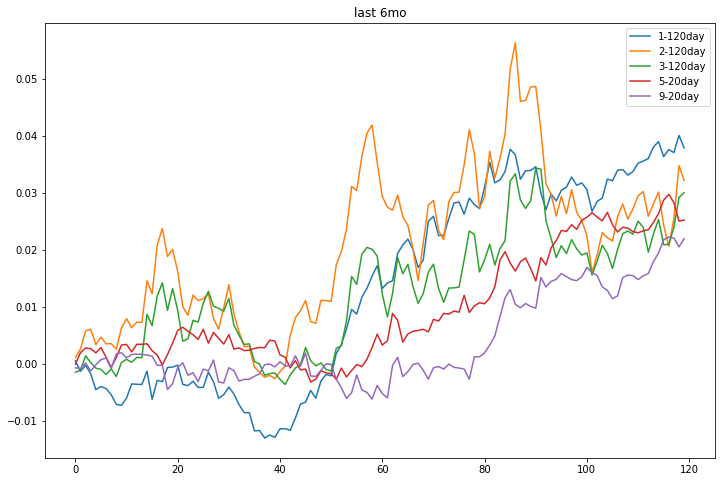

In [48]:
return_vec = pd.read_csv('real_returns_0501.csv')[-120:].T

def calIR(p, returns):
    daily_returns = returns.T
    daily_returns['ID'] = daily_returns.index.tolist()
    decisions = pd.DataFrame({'decision': p, 'ID':daily_returns.index.tolist()})    
    portfolio = daily_returns.merge(decisions, on='ID')
    portfolio = portfolio[portfolio.decision != 0]
    weighted_portfolio_return = pd.DataFrame((portfolio.iloc[:, :daily_returns.shape[1]-1].to_numpy().T * portfolio.decision.to_numpy()).T)
    # print(weighted_portfolio_return)
    portfolio_daily_return = weighted_portfolio_return.apply(lambda x: np.log(1 + x)).sum(axis=0)
    # print(weighted_portfolio_return.sum(axis=0))
    # print(weighted_portfolio_return)

    ret_T = sum(portfolio_daily_return)
    D = portfolio_daily_return.shape[0]
    var = np.sum([(x - ret_T / D)**2 for x in portfolio_daily_return.tolist()]) / (D-1)
    sdp = np.sqrt(var)
    annualized_IR = (D+1)/D * 12 * ret_T / np.sqrt(252) / sdp
    return annualized_IR, portfolio_daily_return

_, portfolio_daily_return1 = calIR(weight1, return_vec.T)
_, portfolio_daily_return2 = calIR(weight2, return_vec.T)
_, portfolio_daily_return3 = calIR(weight3, return_vec.T)
_, portfolio_daily_return4 = calIR(weight4, return_vec.T)
_, portfolio_daily_return5 = calIR(weight5, return_vec.T)
_, portfolio_daily_return6 = calIR(weight6, return_vec.T)
_, portfolio_daily_return7 = calIR(weight7, return_vec.T)
_, portfolio_daily_return8 = calIR(weight8, return_vec.T)
_, portfolio_daily_return9 = calIR(weight9, return_vec.T)

fig = plt.figure(figsize=(12,8))
plt.plot(np.cumsum(portfolio_daily_return1), label='1-120day')
plt.plot(np.cumsum(portfolio_daily_return2), label='2-120day')
plt.plot(np.cumsum(portfolio_daily_return3), label='3-120day')
# plt.plot(np.cumsum(portfolio_daily_return4), label='4-120day')
plt.plot(np.cumsum(portfolio_daily_return5), label='5-20day')
# plt.plot(np.cumsum(portfolio_daily_return6), label='6-20day')
# plt.plot(np.cumsum(portfolio_daily_return8), label='8-20day')
plt.plot(np.cumsum(portfolio_daily_return9), label='9-20day')

plt.legend()
plt.title('last 6mo')

In [52]:
decision_df = pd.DataFrame({'ID':return_vec.index, 'Decision1':weight1, 'Decision2':weight2, 'Decision3':weight3, 'Decision5':weight5, 'Decision9':weight9})
decision_df['Decision1'] = decision_df['Decision1'].apply(lambda x:round(x,4))
decision_df['Decision2'] = decision_df['Decision2'].apply(lambda x:round(x,4))
decision_df['Decision3'] = decision_df['Decision3'].apply(lambda x:round(x,4))
decision_df['Decision5'] = decision_df['Decision5'].apply(lambda x:round(x,4))
decision_df['Decision9'] = decision_df['Decision9'].apply(lambda x:round(x,4))

In [54]:
decision_df.to_csv('F:/M6/submission/0501/decision_0501.csv', index=False)

In [55]:
decision_df

,ID,Decision1,Decision2,Decision3,Decision5,Decision9
0,ABBV,-0.0275,-0.0011,0.0093,0.0076,0.0072
1,ACN,-0.0398,-0.0153,-0.0074,-0.0120,-0.0152
2,AEP,-0.0018,-0.0001,-0.0067,0.0113,0.0107
3,AIZ,0.0014,-0.0136,0.0008,-0.0150,-0.0142
4,ALLE,0.0094,-0.0102,0.0026,-0.0128,-0.0122
...,...,...,...,...,...,...
95,XLP,-0.0089,-0.0125,0.0078,-0.0044,-0.0042
96,XLU,0.0084,0.0023,-0.0009,-0.0071,-0.0068
97,XLV,-0.0146,-0.0192,-0.0038,0.0090,0.0085
98,XLY,0.0144,-0.0111,-0.0080,-0.0134,-0.0127


Text(0.5, 1.0, 'last mo')

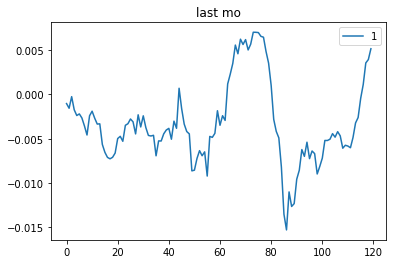

In [26]:
plt.plot(np.cumsum(portfolio_daily_return1), label='1')
# plt.plot(np.cumsum(portfolio_daily_return2), label='2')
# plt.plot(np.cumsum(portfolio_daily_return3), label='3')
# plt.plot(np.cumsum(portfolio_daily_return4), label='4')
plt.legend()
plt.title('last mo')

Text(0.5, 1.0, 'last 2mo')

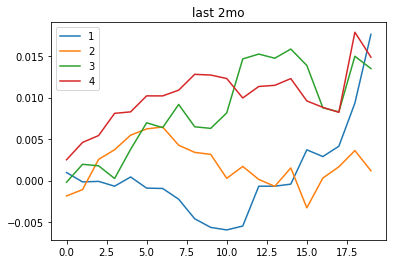

In [142]:
plt.plot(np.cumsum(portfolio_daily_return1), label='1')
plt.plot(np.cumsum(portfolio_daily_return2), label='2')
plt.plot(np.cumsum(portfolio_daily_return3), label='3')
plt.plot(np.cumsum(portfolio_daily_return4), label='4')
plt.legend()
plt.title('last 2mo')

In [ ]:
from scipy.optimize import NonlinearConstraint, Bounds
from scipy.optimize import rosen, differential_evolution
def constr_f(x):
    x = [abs(i) for i in x]
    return sum(x)

nlc = NonlinearConstraint(constr_f, 0.25, 1)

bounds = [(-1, 1)] * 100
result = differential_evolution(obj_func, bounds, constraints=(nlc), seed=1, maxiter=10)

In [41]:
result

           constr: [array([0.])]
 constr_violation: 0.0
              fun: 0.0011376819954983107
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 780
              nit: 34
          success: True
                x: array([0.96627243, 0.93371891])

In [ ]:
# from scipy.optimize import differential_evolution,NonlinearConstraint
# import numpy as np

# # 定义目标函数
# def ackley(x):
#     arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
#     arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
#     return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
# bounds = [(-5, 5), (-5, 5)]

# # 定义约束条件
# def constr_f(x):
#     return np.array(x[0] + 2*x[1])

# # 实例约束条件
# # x1+x2<=4
# nlc = NonlinearConstraint(constr_f,-np.inf,4)

# result = differential_evolution(ackley, bounds,constraints=(nlc))
# print(result.x), print(result.fun)
# print(result)

In [58]:
weights = pd.read_csv('F:/M6/submission/0501/decision_0501.csv')
weights = weights.sort_values('ID')

In [59]:
weights.head()

,ID,Decision1,Decision2,Decision3,Decision5,Decision9
0,ABBV,-0.0275,-0.0011,0.0093,0.0076,0.0072
1,ACN,-0.0398,-0.0153,-0.0074,-0.0120,-0.0152
2,AEP,-0.0018,-0.0001,-0.0067,0.0113,0.0107
3,AIZ,0.0014,-0.0136,0.0008,-0.0150,-0.0142
4,ALLE,0.0094,-0.0102,0.0026,-0.0128,-0.0122


In [81]:
filename = 'ensemble_sub_20220426_final.csv'
data = pd.read_csv('F:/M6/submission/0501/' + filename)

In [82]:
data = data.sort_values('ID')

In [83]:
data.head()

,ID,Rank1,Rank2,Rank3,Rank4,Rank5,Decision
0,ABBV,0.2483,0.1703,0.1637,0.1934,0.2243,0.0
1,ACN,0.2058,0.1992,0.2024,0.2167,0.1759,0.0
2,AEP,0.2278,0.1887,0.1868,0.2087,0.1880,0.0
3,AIZ,0.2158,0.1983,0.1955,0.2136,0.1768,0.0
4,ALLE,0.2066,0.2028,0.2007,0.2148,0.1751,0.0


In [84]:
data['Decision'] = weights['Decision5']

In [85]:
data.head()

,ID,Rank1,Rank2,Rank3,Rank4,Rank5,Decision
0,ABBV,0.2483,0.1703,0.1637,0.1934,0.2243,0.0076
1,ACN,0.2058,0.1992,0.2024,0.2167,0.1759,-0.0120
2,AEP,0.2278,0.1887,0.1868,0.2087,0.1880,0.0113
3,AIZ,0.2158,0.1983,0.1955,0.2136,0.1768,-0.0150
4,ALLE,0.2066,0.2028,0.2007,0.2148,0.1751,-0.0128


In [86]:
data.Decision.apply(abs).sum()

0.9997

In [88]:
data.to_csv('F:/M6/submission/0501/' + filename, index=False)

In [89]:
data[['Rank1', 'Rank2', 'Rank3', 'Rank4', 'Rank5']] = 0.2
data['Decision'] = weights['Decision3']

In [90]:
data.head()

,ID,Rank1,Rank2,Rank3,Rank4,Rank5,Decision
0,ABBV,0.2,0.2,0.2,0.2,0.2,0.0093
1,ACN,0.2,0.2,0.2,0.2,0.2,-0.0074
2,AEP,0.2,0.2,0.2,0.2,0.2,-0.0067
3,AIZ,0.2,0.2,0.2,0.2,0.2,0.0008
4,ALLE,0.2,0.2,0.2,0.2,0.2,0.0026


In [91]:
data.to_csv('F:/M6/submission/0501/'+'same_weight.csv', index=False)